In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

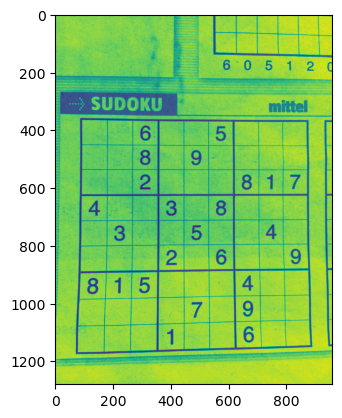

In [2]:
image_url = 'image1004.jpg'
img = cv2.imread(image_url, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

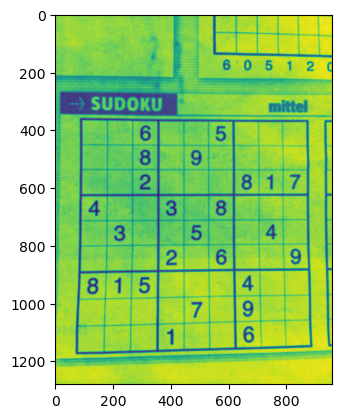

In [3]:
proc = cv2.GaussianBlur(img.copy(), (9, 9), 0)

plt.imshow(proc)

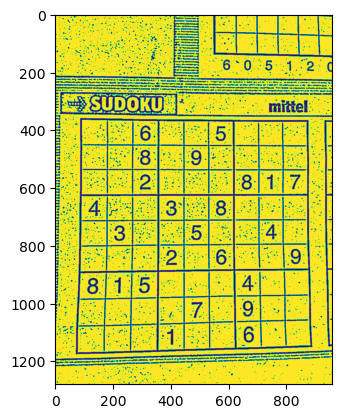

In [4]:
process = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.imshow(process)

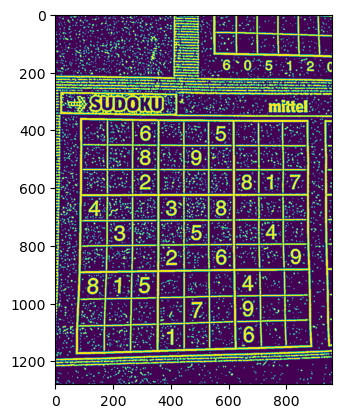

In [5]:
process = cv2.bitwise_not(process, process)

kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]], np.uint8)
process = cv2.dilate(process, kernel)

plt.imshow(process)

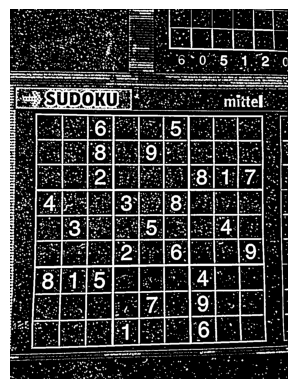

In [6]:
contours, _ = cv2.findContours(process, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area = 500
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

img = process.copy()

cv2.drawContours(img, filtered_contours, -1, (0, 255, 0), 2)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
template_dir = './Dataset/TNRT/'
template_names = [str(i) + '.png' for i in range(10)]

print(template_names)

for template_name in template_names:
    template = cv2.resize(cv2.imread(template_dir + template_name, 0), (0, 0), fx=0.8, fy=0.8)
    h, w = template.shape[:2]

    methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED]

    for method in methods:
        result = cv2.matchTemplate(img, template, method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if method in [cv2.TM_CCORR]:
            location = min_loc
        else:
            location = max_loc

        bottom_right = (location[0] + w, location[1] + h)
        cv2.rectangle(img, location, bottom_right, 20, 5)

plt.imshow(img, cmap='gray')
plt.show()

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
